In [9]:
# !pip install geopandas


Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import os
import arcpy
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd


In [2]:
os.chdir("..") # return to the main directory
home_wd = os.getcwd()
home_wd

'c:\\Users\\milan\\OneDrive - MUNI\\VŠ\\PhD\\Zahraniční stáž\\Work\\HeiGIT_notebooks\\analysis\\ai-assisted-osm-mapping-stats'

In [3]:
in_af = os.path.join(home_wd, r"shp\africa-states-borders.shp")
in_na = os.path.join(home_wd, r"shp\northamerica-states-borders.shp")
out_af = os.path.join(home_wd, r"geojson-africa-states", "")
out_na = os.path.join(home_wd, r"geojson-northamerica-states", "")

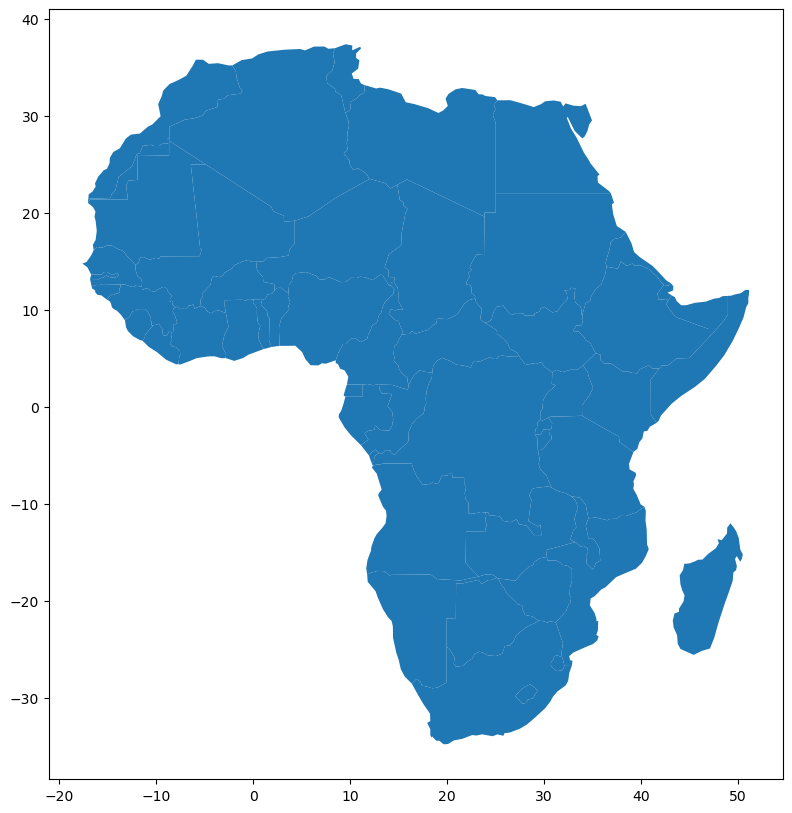

In [4]:
# Load the shapefile using GeoPandas
data = gpd.read_file(in_af)

# Plot the shapefile using GeoPandas
fig, ax = plt.subplots(figsize=(10, 10))
data.plot(ax=ax)
plt.show()


In [5]:
arcpy.Exists(in_af)


True

In [6]:
flds = [str(f.name) for f in arcpy.ListFields(in_af)]
for idx, fld in enumerate(flds):
    print(idx, fld)

0 FID
1 Shape
2 scalerank
3 featurecla
4 labelrank
5 sovereignt
6 sov_a3
7 adm0_dif
8 level
9 type
10 admin
11 adm0_a3
12 geou_dif
13 geounit
14 gu_a3
15 su_dif
16 subunit
17 su_a3
18 brk_diff
19 name
20 name_long
21 brk_a3
22 brk_name
23 brk_group
24 abbrev
25 postal
26 formal_en
27 formal_fr
28 note_adm0
29 note_brk
30 name_sort
31 name_alt
32 mapcolor7
33 mapcolor8
34 mapcolor9
35 mapcolor13
36 pop_est
37 gdp_md_est
38 pop_year
39 lastcensus
40 gdp_year
41 economy
42 income_grp
43 wikipedia
44 fips_10
45 iso_a2
46 iso_a3
47 iso_n3
48 un_a3
49 wb_a2
50 wb_a3
51 woe_id
52 adm0_a3_is
53 adm0_a3_us
54 adm0_a3_un
55 adm0_a3_wb
56 continent
57 region_un
58 subregion
59 region_wb
60 name_len
61 long_len
62 abbrev_len
63 tiny
64 homepart
65 filename


In [10]:
# Use a search cursor to iterate through the rows of the table and create a list of dictionaries
data = []
with arcpy.da.SearchCursor(in_af, flds) as cur:
    for row in cur:
        data.append(dict(zip(flds, row)))

# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(data)
df.head()


,FID,Shape,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,...,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename
0,0,"(29.913901081153057, -3.377391780507063)",1,Admin-0 country,6,Burundi,BDI,0,2,Sovereign country,...,Africa,Africa,Eastern Africa,Sub-Saharan Africa,7,7,4,-99,1,BDI.geojson
1,1,"(2.3373776582836743, 9.647430604325601)",1,Admin-0 country,5,Benin,BEN,0,2,Sovereign country,...,Africa,Africa,Western Africa,Sub-Saharan Africa,5,5,5,-99,1,BEN.geojson
2,2,"(-1.7765373932154904, 12.311650411193025)",1,Admin-0 country,3,Burkina Faso,BFA,0,2,Sovereign country,...,Africa,Africa,Western Africa,Sub-Saharan Africa,12,12,4,-99,1,BFA.geojson
3,3,"(-5.612043679188234, 7.55375503953244)",1,Admin-0 country,3,Ivory Coast,CIV,0,2,Sovereign country,...,Africa,Africa,Western Africa,Sub-Saharan Africa,13,13,4,-99,1,CIV.geojson
4,4,"(23.58295588756028, -2.8502756233323794)",1,Admin-0 country,2,Democratic Republic of the Congo,COD,0,2,Sovereign country,...,Africa,Africa,Middle Africa,Sub-Saharan Africa,15,32,6,-99,1,COD.geojson


In [11]:
with arcpy.da.SearchCursor(in_af, flds) as cur:
    for row in cur:
        region_lst = [row[5]]
        id_lst = [row[0]]
        reg_id_dic = {k:v for k,v in zip(region_lst, id_lst)}
        for region in region_lst:
            field = arcpy.AddFieldDelimiters(in_af, "sovereignt")
            selection = "{field} = '{val}'".format(field=field, val=region)
            selected = arcpy.management.SelectLayerByAttribute(
                in_af, "NEW_SELECTION", selection)
            arcpy.conversion.FeaturesToJSON(selected, f"{out_af}{reg_id_dic[region]}_{region}.geojson", geoJSON=True)
            print(f"{selection} was exported")

"sovereignt" = 'Burundi' was exported
"sovereignt" = 'Benin' was exported
"sovereignt" = 'Burkina Faso' was exported
"sovereignt" = 'Ivory Coast' was exported
"sovereignt" = 'Democratic Republic of the Congo' was exported
"sovereignt" = 'Angola' was exported
"sovereignt" = 'Botswana' was exported
"sovereignt" = 'Cameroon' was exported
"sovereignt" = 'Republic of Congo' was exported
"sovereignt" = 'Central African Republic' was exported
"sovereignt" = 'Djibouti' was exported
"sovereignt" = 'Algeria' was exported
"sovereignt" = 'Egypt' was exported
"sovereignt" = 'Gabon' was exported
"sovereignt" = 'Eritrea' was exported
"sovereignt" = 'Ghana' was exported
"sovereignt" = 'Ethiopia' was exported
"sovereignt" = 'Guinea' was exported
"sovereignt" = 'Gambia' was exported
"sovereignt" = 'Guinea Bissau' was exported
"sovereignt" = 'Morocco' was exported
"sovereignt" = 'Liberia' was exported
"sovereignt" = 'Lesotho' was exported
"sovereignt" = 'Equatorial Guinea' was exported
"sovereignt" = 'Li